In [2]:
import os
from allensdk.brain_observatory.ecephys.ecephys_session import EcephysSession
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

data_dir = '/Users/bioel/PycharmProjects/untitled4/ecephys_cache_dir'
manifest_path = os.path.join(data_dir, 'manifest.json')
cache = EcephysProjectCache.from_warehouse(manifest = manifest_path)

In [5]:
import pandas as pd
session_table = cache.get_session_table()
sessions = session_table.loc[session_table.session_type == 'brain_observatory_1.1'].index
sessions

Int64Index([715093703, 719161530, 721123822, 732592105, 737581020, 739448407,
            742951821, 743475441, 744228101, 746083955, 750332458, 750749662,
            751348571, 754312389, 754829445, 755434585, 756029989, 757216464,
            757970808, 758798717, 759883607, 760345702, 760693773, 761418226,
            762120172, 762602078, 763673393, 773418906, 791319847, 797828357,
            798911424, 799864342],
           dtype='int64', name='id')

In [9]:
only_these = sessions[-4]
for session_id in range(len(sessions)):
    s_id = only_these[session_id]
    current_session=cache.get_session_data(session_id=s_id)
    print('Currently downloading session # ' + str(s_id))
    continue

TypeError: object of type 'numpy.int64' has no len()

In [8]:
from allensdk.brain_observatory.ecephys.visualization import plot_mean_waveforms, plot_spike_counts, raster_plot
session = cache.get_session_data(session_id=715093703)
units_with_very_high_snr = session.units[session.units['snr'] > 2.0]
high_snr_unit_ids = units_with_very_high_snr.index.values
import matplotlib.pyplot as plt

c:\users\bioel\anaconda3\envs\untitled4\lib\site-packages\allensdk\brain_observatory\ecephys\ecephys_session.py:1086: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',"


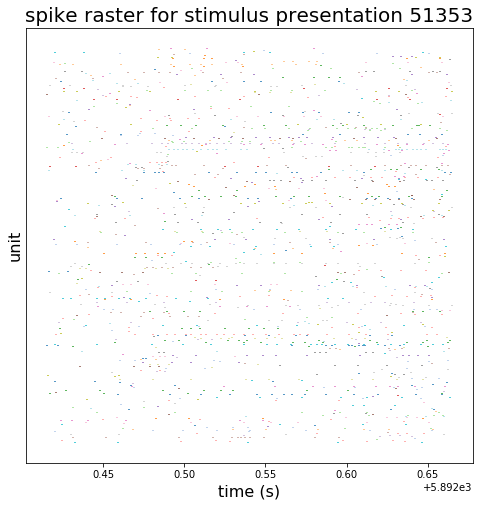

color                              null
contrast                           null
frame                                 5
orientation                        null
phase                              null
pos                                null
size                               null
spatial_frequency                  null
start_time                      5892.42
stimulus_block                        9
stimulus_name            natural_scenes
stop_time                       5892.67
temporal_frequency                 null
x_position                         null
y_position                         null
duration                       0.250196
stimulus_condition_id              4908
Name: 51353, dtype: object

In [9]:

drifting_gratings_presentation_ids = session.stimulus_presentations.loc[
    (session.stimulus_presentations['stimulus_name'] == 'natural_scenes')
].index.values

times = session.presentationwise_spike_times(
    stimulus_presentation_ids=drifting_gratings_presentation_ids,
    unit_ids=high_snr_unit_ids
)

first_drifting_grating_presentation_id = times['stimulus_presentation_id'].values[0]
plot_times = times[times['stimulus_presentation_id'] == first_drifting_grating_presentation_id]

fig = raster_plot(plot_times, title=f'spike raster for stimulus presentation {first_drifting_grating_presentation_id}')
plt.show()

# also print out this presentation
session.stimulus_presentations.loc[first_drifting_grating_presentation_id]
